### Observations
    - The average weight of the mouse increases as the tumor mass increases for mice that are on the Capomulin drug regime. This could be due to the volume of the tumor causing the overall weight of the mouse to rise. 
    - Mice on the drug regime Capomulin have more timepoints avaliable. This could represent that the mice on the drug Capomulin lasted longer in the study than the mice on other drug regimes. 
    - The boxplot data displays that the distribution of the final tumor volume of the mice on Capomulin and Ramicane was lower than the distrubution of tumor volume for the mice on Infubinol and Ceftamin. This could lead to more studies being done on the effectiveness of both Capomulin and Ramicane on the reduction in tumor volume over time. 
    - The linear regression that is represented in the Average Mouse Weight versus Average Tumor Volume for the Capomulin Treatment Regimen scatter plot displays that there is a strong correlation between the weight of the mouse and the size of the tumor. This is also represented by the calcuated pearson correlation coefficient of 0.84, since this number is approaching a postitive 1 it displays that the two variables are postitively correlated. 

In [1]:
# imports  and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
df = study_results.merge(mouse_metadata, on="Mouse ID", how="inner")
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [7]:
droppeddf=df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
droppeddf

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [8]:
droppeddf.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,19.597458,50.449276,1.023835,12.792903,25.661547
std,14.084762,8.904565,1.138507,7.186737,3.926776
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951421,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [9]:
# mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.
summaryTable = droppeddf.groupby(
   ['Drug Regimen']
).agg(
    {
         'Tumor Volume (mm3)':["mean", "median", "var","std", "sem"] 
    }
)
summaryTable

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [10]:
drug = droppeddf.groupby('Drug Regimen')

# Count how many times each maker appears in our group
mice_count = drug['Mouse ID'].count()

mice_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [11]:
droppeddf['Drug Regimen'].unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'],
      dtype=object)

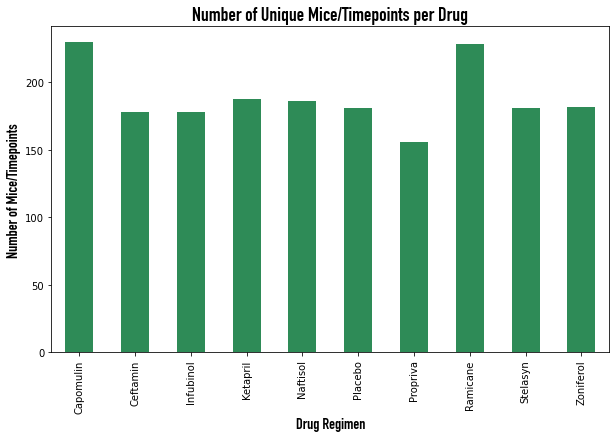

In [12]:
plt.figure(figsize=(10,6))


mice_count.plot(kind = "bar", color="seagreen")
plt.title("Number of Unique Mice/Timepoints per Drug", fontsize=20, fontweight="bold", fontname="DIN Condensed")
plt.xlabel('Drug Regimen', fontsize=16, fontname="DIN Condensed")
plt.ylabel("Number of Mice/Timepoints", fontsize=16, fontname="DIN Condensed")

plt.show()

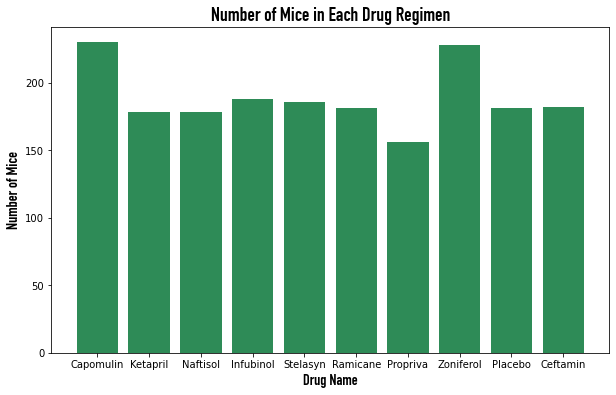

In [13]:
#shows  the number of total mice for each treatment regimen throughout the course of the study.
x_axis = droppeddf['Drug Regimen'].unique()

#figsize
plt.figure(figsize=(10,6))

#raw plot
plt.bar(x_axis, mice_count, color='seagreen', align="center")

# Give our chart some labels and a tile
plt.title("Number of Mice in Each Drug Regimen", fontsize=20, fontname="DIN Condensed")
plt.xlabel("Drug Name", fontsize=16, fontname="DIN Condensed")
plt.ylabel("Number of Mice",fontsize=16, fontname="DIN Condensed")

#show/save
plt.show()

In [14]:
#Generate a pie plots using pyplot that shows the distribution of female or male mice in the study.
#Finding Female to Male Values


In [15]:
genderdf = droppeddf.groupby(['Sex','Mouse ID']).size().reset_index().rename(columns={0:'count'})
genderdf

,Sex,Mouse ID,count
0,Female,a203,10
1,Female,a251,10
2,Female,a262,10
3,Female,a275,10
4,Female,a366,7
...,...,...,...
244,Male,y449,4
245,Male,y793,10
246,Male,y865,10
247,Male,z578,10


In [16]:
genderCounts= genderdf.Sex.value_counts()

df = genderdf.Sex.value_counts().rename_axis('Sex')
df

Sex
Male      125
Female    124
Name: Sex, dtype: int64

In [17]:
genderdf.Sex.value_counts()/len(genderdf)

Male      0.502008
Female    0.497992
Name: Sex, dtype: float64

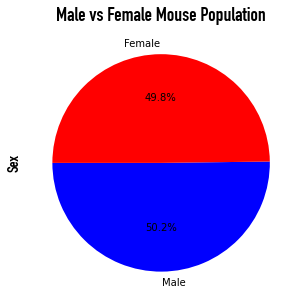

In [18]:


secondpie = df.plot.pie(y=('Counts'), figsize=(5, 5), autopct="%1.1f%%",startangle=180, colors =['blue', 'red'])
plt.title('Male vs Female Mouse Population', fontsize=20, fontname="DIN Condensed")
plt.ylabel('Sex', fontsize=16, fontname="DIN Condensed")

plt.savefig('piechart2')
plt.show()

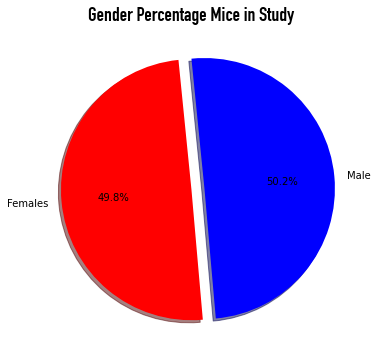

In [19]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
explode = (0.1, 0)
labels = ["Male","Females"]
plt.figure(figsize=(10,6))

#create raw plot
plt.pie(genderCounts,labels=labels,explode=explode, autopct="%1.1f%%", startangle=275, shadow=True, colors =['blue', 'red'])


plt.title("Gender Percentage Mice in Study",fontsize=20, fontname="DIN Condensed")

plt.show()

## Creating data frames per each drug to capture max tumor volume 

### Capomulin

In [20]:
droppeddf.groupby('Mouse ID').max()['Timepoint']

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [21]:
cap_df = droppeddf.loc[droppeddf["Drug Regimen"] == "Capomulin",:]
cap_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [22]:
capMax= cap_df.groupby('Mouse ID').max()['Timepoint']
capMaxdf=pd.DataFrame(capMax)
capDF = pd.merge(capMaxdf, cap_df, on=("Mouse ID","Timepoint"),how="left")
capDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [23]:
captumorVol = capDF['Tumor Volume (mm3)']
quartiles = captumorVol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} and {upper_bound}above could be outliers.")


The lower quartile of Tumor Volume (mm3) is: 32.37735684
The upper quartile of Tumor Volume (mm3) is: 40.1592203
The interquartile range of Tumor Volume (mm3) is: 7.781863460000004
The the median of Tumor Volume (mm3) is: 38.125164399999996 
Values below 20.70456164999999 and 51.83201549above could be outliers.


### Ramicane

In [24]:
ram_df = droppeddf.loc[droppeddf["Drug Regimen"] == "Ramicane",:]
ram_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
436,c458,0,45.000000,0,Ramicane,Female,23,20
437,c458,5,45.722279,0,Ramicane,Female,23,20
438,c458,10,44.454378,1,Ramicane,Female,23,20
439,c458,15,45.107423,2,Ramicane,Female,23,20
440,c458,20,39.505135,2,Ramicane,Female,23,20


In [25]:
ramMax = ram_df.groupby('Mouse ID').max()['Timepoint']
ramMaxdf =pd.DataFrame(ramMax)
ramDF = pd.merge(ramMaxdf, ram_df, on=("Mouse ID","Timepoint"),how="left")
ramDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [26]:
ramtumorVol = ramDF['Tumor Volume (mm3)']
quartiles = ramtumorVol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} and {upper_bound}above could be outliers.")


The lower quartile of Tumor Volume (mm3) is: 31.56046955
The upper quartile of Tumor Volume (mm3) is: 40.65900627
The interquartile range of Tumor Volume (mm3) is: 9.098536719999998
The the median of Tumor Volume (mm3) is: 36.56165229 
Values below 17.912664470000003 and 54.30681135above could be outliers.


### Infubinol

In [27]:
inf_df = droppeddf.loc[droppeddf["Drug Regimen"] == "Infubinol",:]
inf_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
213,c326,0,45.000000,0,Infubinol,Female,18,25
214,c326,5,36.321346,0,Infubinol,Female,18,25
215,c139,0,45.000000,0,Infubinol,Male,11,28
216,c139,5,48.753112,0,Infubinol,Male,11,28
217,c139,10,49.992954,0,Infubinol,Male,11,28


In [28]:
infMax = inf_df.groupby('Mouse ID').max()['Timepoint']
infMaxdf =pd.DataFrame(infMax)
infDF = pd.merge(infMaxdf, inf_df, on=("Mouse ID","Timepoint"),how="left")
infDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [29]:
inftumorVol = infDF['Tumor Volume (mm3)']
quartiles = inftumorVol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} and {upper_bound}above could be outliers.")


The lower quartile of Tumor Volume (mm3) is: 54.04860769
The upper quartile of Tumor Volume (mm3) is: 65.52574285
The interquartile range of Tumor Volume (mm3) is: 11.477135160000003
The the median of Tumor Volume (mm3) is: 60.16518046 
Values below 36.83290494999999 and 82.74144559000001above could be outliers.


### Ceftamin

In [30]:
cef_df = droppeddf.loc[droppeddf["Drug Regimen"] == "Ceftamin",:]
cef_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1304,x822,0,45.000000,0,Ceftamin,Male,3,29
1305,x822,5,45.671104,1,Ceftamin,Male,3,29
1306,x822,10,48.983717,1,Ceftamin,Male,3,29
1307,x822,15,49.694665,1,Ceftamin,Male,3,29
1308,x822,20,51.914910,2,Ceftamin,Male,3,29


In [31]:
cefMax = cef_df.groupby('Mouse ID').max()['Timepoint']
cefMaxdf =pd.DataFrame(cefMax)
cefDF = pd.merge(cefMaxdf, cef_df, on=("Mouse ID","Timepoint"),how="left")
cefDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [32]:
ceftumorVol = cefDF['Tumor Volume (mm3)']
quartiles = ceftumorVol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} and {upper_bound}above could be outliers.")

The lower quartile of Tumor Volume (mm3) is: 48.72207785
The upper quartile of Tumor Volume (mm3) is: 64.29983003
The interquartile range of Tumor Volume (mm3) is: 15.577752179999997
The the median of Tumor Volume (mm3) is: 59.85195552 
Values below 25.355449580000002 and 87.66645829999999above could be outliers.


<Figure size 720x432 with 0 Axes>

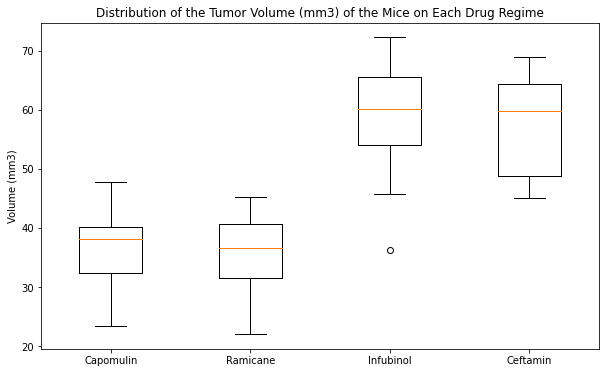

In [42]:
plt.figure(figsize=(10,6))
data = [captumorVol,ramtumorVol, inftumorVol, ceftumorVol]
labels = ('Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin')
plt.figure(figsize=(10,6))
plt.boxplot(data, labels=labels)
plt.title('Distribution of the Tumor Volume (mm3) of the Mice on Each Drug Regime')
plt.ylabel('Volume (mm3)')
plt.show()

#  Line Plot

##### Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.

In [34]:
cap_df["Mouse ID"].values

array(['b128', 'b128', 'b128', 'b128', 'b128', 'b128', 'b128', 'b128',
       'b128', 'b128', 'j246', 'j246', 'j246', 'j246', 'j246', 'j246',
       'j246', 'j246', 'r554', 'r554', 'r554', 'r554', 'r554', 'r554',
       'r554', 'r554', 'r554', 'r554', 's185', 's185', 's185', 's185',
       's185', 's185', 's185', 's185', 's185', 's185', 'b742', 'b742',
       'b742', 'b742', 'b742', 'b742', 'b742', 'b742', 'b742', 'b742',
       'x401', 'x401', 'x401', 'x401', 'x401', 'x401', 'x401', 'x401',
       'x401', 'x401', 'l509', 'l509', 'l509', 'l509', 'l509', 'l509',
       'l509', 'l509', 'l509', 'l509', 's710', 's710', 's710', 's710',
       's710', 's710', 's710', 's710', 's710', 's710', 'r157', 'r157',
       'r157', 'r157', 'u364', 'u364', 'u364', 'u364', 'u364', 'u364',
       'u364', 'u364', 'u364', 'u364', 'j119', 'j119', 'j119', 'j119',
       'j119', 'j119', 'j119', 'j119', 'j119', 'j119', 'v923', 'v923',
       'v923', 'v923', 'v923', 'v923', 'v923', 'v923', 'v923', 'v923',
      

In [35]:
singleMouse = cap_df.loc[cap_df['Mouse ID'] == 'i738',:]
singleMouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1785,i738,0,45.000000,0,Capomulin,Female,23,20
1786,i738,5,45.595685,0,Capomulin,Female,23,20
1787,i738,10,43.421014,0,Capomulin,Female,23,20
1788,i738,15,37.978778,0,Capomulin,Female,23,20
1789,i738,20,38.531136,0,Capomulin,Female,23,20
1790,i738,25,34.973438,0,Capomulin,Female,23,20
1791,i738,30,35.578780,1,Capomulin,Female,23,20
1792,i738,35,36.175953,1,Capomulin,Female,23,20
1793,i738,40,36.843898,2,Capomulin,Female,23,20
1794,i738,45,37.311846,2,Capomulin,Female,23,20


In [36]:
y_axis = singleMouse['Timepoint']
y_axis

1785     0
1786     5
1787    10
1788    15
1789    20
1790    25
1791    30
1792    35
1793    40
1794    45
Name: Timepoint, dtype: int64

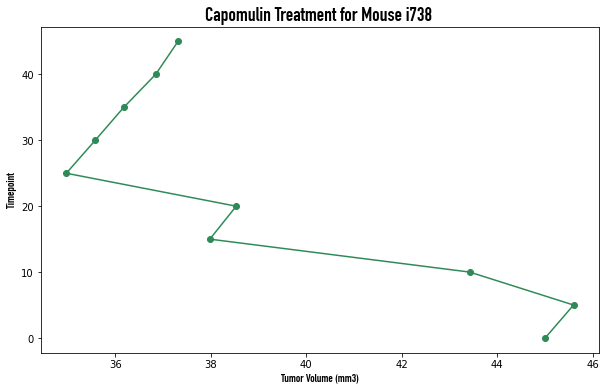

In [37]:
plt.figure(figsize=(10,6))
x_axis = singleMouse['Tumor Volume (mm3)']
y_axis = singleMouse['Timepoint']

plt.plot(x_axis, y_axis, color = "seagreen", marker="o")
plt.title("Capomulin Treatment for Mouse i738 ", fontsize=20, fontname="DIN Condensed", fontweight="bold")
plt.ylabel("Timepoint", fontsize=12, fontname="DIN Condensed")
plt.xlabel("Tumor Volume (mm3)", fontsize=12, fontname="DIN Condensed")
plt.show()

#### Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

In [38]:
avg = cap_df.groupby(['Mouse ID']).mean
avg()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


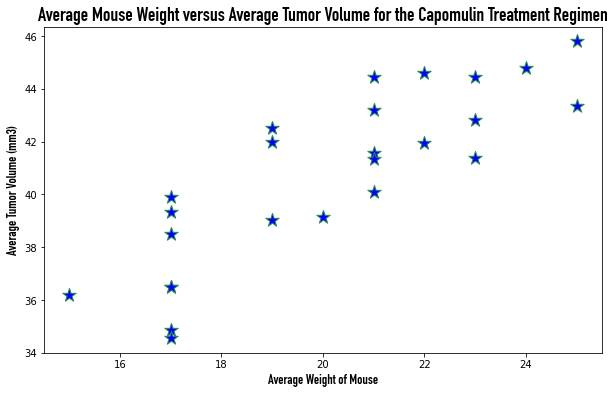

In [39]:
plt.figure(figsize=(10,6))
avg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(avg['Weight (g)'],avg['Tumor Volume (mm3)'], marker="*", facecolors="blue", edgecolors="seagreen", s=200)
plt.title('Average Mouse Weight versus Average Tumor Volume for the Capomulin Treatment Regimen',fontsize=20, fontname="DIN Condensed", fontweight="bold" )
plt.xlabel('Average Weight of Mouse', fontsize=14, fontname="DIN Condensed")
plt.ylabel('Average Tumor Volume (mm3)', fontsize=14, fontname="DIN Condensed")

plt.savefig('scatterplot')
plt.show()

### Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

In [40]:
weights = avg['Weight (g)']
volume = avg['Tumor Volume (mm3)']
correlation = st.pearsonr(weights,volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


y = 0.95x + 21.55


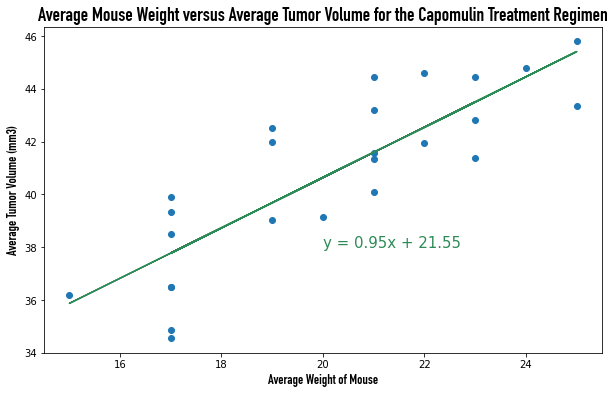

In [41]:
plt.figure(figsize=(10,6))
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg['Weight (g)'], avg['Tumor Volume (mm3)'])

regress_values = avg['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.scatter(avg['Weight (g)'], avg['Tumor Volume (mm3)'])
plt.plot(avg['Weight (g)'],regress_values,"seagreen")
plt.annotate(line_eq,(20, 38),fontsize=15, color="seagreen")
plt.title('Average Mouse Weight versus Average Tumor Volume for the Capomulin Treatment Regimen',fontsize=20, fontname="DIN Condensed", fontweight="bold" )
plt.xlabel('Average Weight of Mouse', fontsize=14, fontname="DIN Condensed")
plt.ylabel('Average Tumor Volume (mm3)', fontsize=14, fontname="DIN Condensed")
plt.show()